## Практическая работа №7 Теория вероятностей и математическая статистика

### Задание №1
Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов. Даны значения роста в трех группах случайно выбранных спортсменов:
Футболисты: 173, 175, 180, 178, 177, 185, 183, 182.
Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180.
Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170.
alpha = 0.05.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
np_football_pls_height = np.array([173, 175, 180, 178, 177, 185, 183, 182])
np_hockey_pls_height = np.array([177, 179, 180, 188, 177, 172, 171, 184, 180])
np_weightlifter_pls_height = np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])
alpha = 0.05

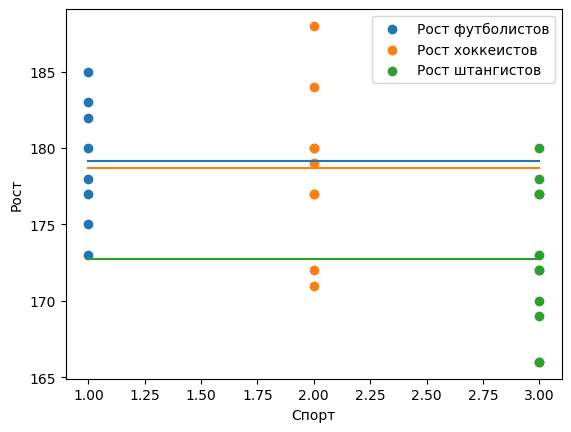

In [15]:
plt.scatter(np.full(shape=len(np_football_pls_height), fill_value=1, dtype=np.int),np_football_pls_height, label='Рост футболистов')
plt.scatter(np.full(shape=len(np_hockey_pls_height), fill_value=2, dtype=np.int),np_hockey_pls_height, label='Рост хоккеистов')
plt.scatter(np.full(shape=len(np_weightlifter_pls_height), fill_value=3, dtype=np.int),np_weightlifter_pls_height, label='Рост штангистов')

plt.xlabel('Спорт')
plt.ylabel('Рост')

# Провести линии средних значений
plt.plot([1,2,3], np.full(shape=3, fill_value=np.mean(np_football_pls_height)))
plt.plot([1,2,3], np.full(shape=3, fill_value=np.mean(np_hockey_pls_height)))
plt.plot([1,2,3], np.full(shape=3, fill_value=np.mean(np_weightlifter_pls_height)))

plt.legend()
plt.show()

Даже из графика видно сильное различие в среднем росте штангистов.
Свормулируем гипотезы:
- Н0: $\mu_1 = \mu_2 = \mu_3$, нулевая гипотеза, средний рост спортсмена не зависит от вида спорта
- H1: $\mu_1 \neq \mu_2 \neq \mu_3$, альтернативная гипотеза

In [24]:
# Воспользуемся встроенным методом однофакторного дисперсионного анализа библиотеки scipy
pvalue = stats.f_oneway(np_football_pls_height, np_hockey_pls_height, np_weightlifter_pls_height).pvalue
if pvalue < alpha:
    print('Отвергаем нулевую гипотезу, на уровне значимости равном', alpha)
else:
    print('Отвергаем нулевую гипотезу, на уровне значимости равном', alpha)

Отвергаем нулевую гипотезу, на уровне значимости равном 0.05


Так же можно проверить с помощью критерия Фишера.
Для данной выборки табличное значение критерия равен 3.38. Если расчитаный критерий фишера будет больше табличного значения, то нулевую гипотезу отвергаем

In [41]:
def get_fisher(*stats):
    """
    Расчёт критерия Фишера
    :param stats:
    :return: float
    """
    k = len(stats)
    np_full = np.hstack(stats)
    np_full_mean = np.mean(np_full)
    s2_f = 0 # Факторная сумма квадратных отклонений
    s2_r = 0 # Остаточная сумма квадратных отклонений
    n = 0
    for row in stats:
        row_len = len(row)
        row_mean = np.mean(row)
        s2_f += ((row_mean-np_full_mean)**2)*row_len
        s2_r += np.sum((row-row_mean)**2)
        n += row_len
    var_f = s2_f / (k-1) # Факторная дисперсия
    var_r = s2_r / (n-k) # Остаточная дисперсия
    return var_f / var_r

In [43]:
F_tab = 3.38 # Табличное значение критерия
F_c = get_fisher(np_football_pls_height, np_hockey_pls_height, np_weightlifter_pls_height)

print('Табличное значение критерия Фишера:', F_tab)
print('Расчитанное значение критерия Фишера:', round(F_c, 4))
if F_tab < F_c:
    print('Отвергаем нулевую гипотезу, на уровне значимости равном', alpha)
else:
    print('Отвергаем нулевую гипотезу, на уровне значимости равном', alpha)

Табличное значение критерия Фишера: 3.38
Расчитанное значение критерия Фишера: 5.5001
Отвергаем нулевую гипотезу, на уровне значимости равном 0.05


**Ответ:**<br>
**гипотеза H0 отвергается, значит H1 верна на уровне значимости 0.05. Обнаруженны различия между между ростом смортсменов разных видов спорта.**

### Задание №2
**Прикрепить ссылку на курсовой проект на github. (см. выбор темы в ДЗ к Уроку 6)**

[Ссылка](https://github.com/eadevlab/gb.education/blob/main/terver/coursework.ipynb)